In [1]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [15]:
bmodel = models.get_black_bundle_model(channels)

In [4]:
dataset.load_all_data(color=['black'], size=['bundle'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed black key: 8755
  # of unpressed black key: 43883


IntProgress(value=0, max=5000)

In testset: 
  # of pressed black key: 761
  # of unpressed black key: 22433


IntProgress(value=0, max=2993)

In valset: 
  # of pressed black key: 817
  # of unpressed black key: 10769


In [5]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=87766)

(2, 106, 36, 3)
1 0
Samples from X_test: 


IntProgress(value=0, max=44866)

(2, 106, 36, 3)
1 0
Samples from X_val: 


IntProgress(value=0, max=21538)

(2, 106, 36, 3)
1 0


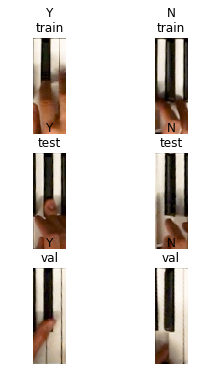

In [6]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb in dataset.data_batch(type=_type, size='bundle', color='black', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [16]:
bmodel.train(dataset, batch_size=32, size='bundle', color='black',
             concatenate=concat,
             num_epochs=20,
             max_num=-1,
             learning_rate=5e-4,
             weight_decay=0.1,
             decay_every=10,
             best_path='keypress_recognition/best_black_bundle_model.tar',
             current_path='keypress_recognition/current_black_bundle.tar',
             method=1)

Epoch 1/20


IntProgress(value=0, max=87766)

train Loss: 0.3002
[[41203  2658]
 [ 2685 41230]]
Precision: 0.94
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=21538)

val Loss: 0.3323
[[10636  1122]
 [  148  9662]]
Precision: 0.98
Recall   : 0.90
Accuracy : 0.94
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 2/20


IntProgress(value=0, max=87766)

train Loss: 0.2771
[[41096  2039]
 [ 2792 41849]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=21538)

val Loss: 0.2115
[[10153    66]
 [  631 10718]]
Precision: 0.94
Recall   : 0.99
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 3/20


IntProgress(value=0, max=87766)

train Loss: 0.2709
[[41097  2083]
 [ 2791 41805]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=21538)

val Loss: 0.3258
[[10082   172]
 [  702 10612]]
Precision: 0.94
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 4/20


IntProgress(value=0, max=87766)

train Loss: 0.2686
[[41051  2027]
 [ 2837 41861]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=21538)

val Loss: 0.7964
[[ 7063     0]
 [ 3721 10784]]
Precision: 0.74
Recall   : 1.00
Accuracy : 0.83
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 5/20


IntProgress(value=0, max=87766)

train Loss: 0.2671
[[40951  1968]
 [ 2937 41920]]
Precision: 0.93
Recall   : 0.96
Accuracy : 0.94


IntProgress(value=0, max=21538)

val Loss: 0.2460
[[10003    39]
 [  781 10745]]
Precision: 0.93
Recall   : 1.00
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 6/20


IntProgress(value=0, max=87766)

train Loss: 0.2647
[[41086  2067]
 [ 2802 41821]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=21538)

val Loss: 0.2576
[[ 9986    80]
 [  798 10704]]
Precision: 0.93
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 7/20


IntProgress(value=0, max=87766)

train Loss: 0.2617
[[41116  1932]
 [ 2772 41956]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21538)

val Loss: 0.3257
[[10243   239]
 [  541 10545]]
Precision: 0.95
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 8/20


IntProgress(value=0, max=87766)

train Loss: 0.2594
[[41126  1896]
 [ 2762 41992]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21538)

val Loss: 0.2319
[[10352   251]
 [  432 10533]]
Precision: 0.96
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 9/20


IntProgress(value=0, max=87766)

train Loss: 0.2595
[[41150  1864]
 [ 2738 42024]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21538)

val Loss: 0.3006
[[ 9793    39]
 [  991 10745]]
Precision: 0.92
Recall   : 1.00
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 10/20


IntProgress(value=0, max=87766)

train Loss: 0.2583
[[41024  1992]
 [ 2864 41896]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=21538)

val Loss: 0.1954
[[10018    13]
 [  766 10771]]
Precision: 0.93
Recall   : 1.00
Accuracy : 0.96
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 11/20


IntProgress(value=0, max=87766)

train Loss: 0.2193
[[41801  1383]
 [ 2087 42505]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21538)

val Loss: 0.1634
[[10447   145]
 [  337 10639]]
Precision: 0.97
Recall   : 0.99
Accuracy : 0.98
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 12/20


IntProgress(value=0, max=87766)

train Loss: 0.2056
[[41996  1294]
 [ 1892 42594]]
Precision: 0.96
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21538)

val Loss: 0.1761
[[10458   131]
 [  326 10653]]
Precision: 0.97
Recall   : 0.99
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 13/20


IntProgress(value=0, max=87766)

train Loss: 0.1998
[[42075  1220]
 [ 1813 42668]]
Precision: 0.96
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=21538)

val Loss: 0.1768
[[10524   174]
 [  260 10610]]
Precision: 0.98
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 14/20


IntProgress(value=0, max=87766)

train Loss: 0.1962
[[42138  1182]
 [ 1750 42706]]
Precision: 0.96
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=21538)

val Loss: 0.1802
[[10431   131]
 [  353 10653]]
Precision: 0.97
Recall   : 0.99
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 15/20


IntProgress(value=0, max=87766)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



train Loss: 0.1916
[[42182  1110]
 [ 1706 42778]]
Precision: 0.96
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=21538)

val Loss: 0.1735
[[10478   157]
 [  306 10627]]
Precision: 0.97
Recall   : 0.99
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 17/20


IntProgress(value=0, max=87766)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



train Loss: 0.1868
[[42243  1063]
 [ 1645 42825]]
Precision: 0.96
Recall   : 0.98
Accuracy : 0.97


IntProgress(value=0, max=21538)

val Loss: 0.1731
[[10480   169]
 [  304 10615]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 19/20


IntProgress(value=0, max=87766)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



train Loss: 0.1835
[[42315  1022]
 [ 1573 42866]]
Precision: 0.96
Recall   : 0.98
Accuracy : 0.97


IntProgress(value=0, max=21538)

val Loss: 0.1706
[[10483   171]
 [  301 10613]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Training complete in 30m 48s
Best val loss: 0.163423


IntProgress(value=0, max=44866)

(12, 106, 36, 3)
tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


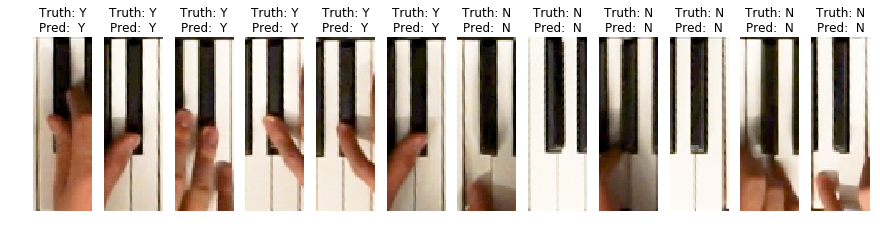

In [17]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb in dataset.data_batch(type='test', size='bundle', color='black', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = bmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()